In [21]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

In [22]:
#name according to ur own directory to recieve csv
#upload calendar csv to jupiter lab by using to upload button while ur work folder is open
df = pd.read_csv('/users/lmackenroth/ds_1300_notebooks/work/calendar.csv')
df

,Category,Tournament,Surface,Prize Money,Draw
0,ATP 250,AUS,Hard,372500.00,SGL 32 DBL 16
1,ATP 250,IND,Hard,398250.00,SGL 32 DBL 16
2,ATP 250,QAT,Hard,1024000.00,SGL 32 DBL 16
3,ATP 250,AUS,Hard,372500.00,SGL 28 DBL 16
4,ATP 250,MCO,Hard,355500.00,SGL 28 DBL 16
...,...,...,...,...,...
61,ATP 250,FRA,Indoor Hard,621989.00,SGL 28 DBL 16
62,ATP 500,ESP,Hard,1467256.00,SGL 32 DBL 16
63,ATP 500,CHE,Indoor Hard,1324531.00,SGL 32 DBL 16
64,ATP 1000,FRA,Hard,2408484.00,SGL 48 DBL 24


In [13]:
countries = df.sort_values(by='Tournament',ascending=True)
countr = countries.groupby('Tournament').mean()['Prize Money'].sort_values()
countr.head()

Tournament
MCO    355500.0
CHL    398250.0
IND    398250.0
ROU    398386.0
SER    403522.0
Name: Prize Money, dtype: float64

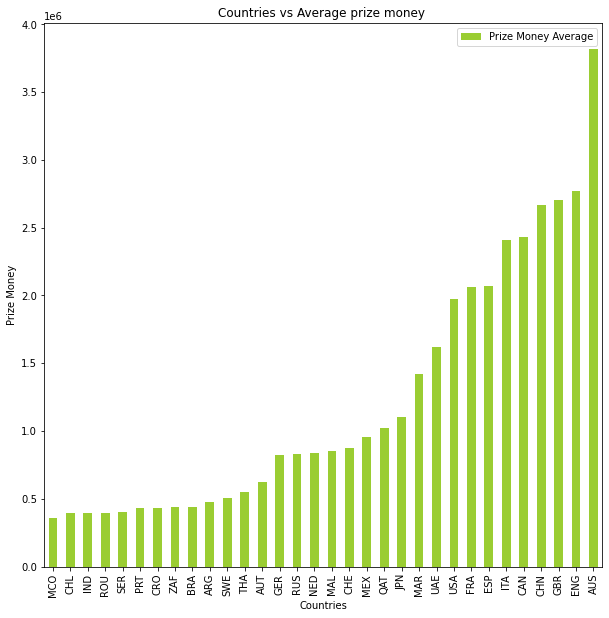

In [14]:
ax = countr.plot.bar(x = 'Tournaments',y = 'Prize Money', legend = 'True' ,label='Prize Money Average', color = 'yellowgreen', title = 'Countries vs Average prize money ',figsize=(10,10))
ax.set_xlabel("Countries")
ax.set_ylabel("Prize Money")
plt.savefig("prizevscountries.png",bbox_inches = 'tight')

In [6]:
plt.savefig("prizevscountries.png")

<Figure size 432x288 with 0 Axes>

In [7]:
#read in serves
serves = pd.read_csv('/users/lmackenroth/ds_1300_notebooks/work/serves.csv')
serves.head()

,Nationality,name,Serve Rating,% 1st Serve,% 1st Serve Points Won,% 2nd Serve Points Won,% Service Games Won,Avg. Aces/ Match,Avg. Double Faults/Match
0,USA,John Isner,312.1,0.69,0.79,0.56,0.92,18.7,2.3
1,CRO,Ivo Karlovic,309.8,0.66,0.83,0.53,0.92,19.8,3.5
2,USA,Reilly Opelka,303.4,0.64,0.79,0.55,0.90,18.1,2.9
3,CAN,Milos Raonic,302.8,0.63,0.81,0.55,0.91,15.5,3.3
4,USA,Andy Roddick,299.9,0.65,0.79,0.56,0.90,11.7,2.0


In [8]:
serves.groupby(by = 'Nationality').mean().head()
#only run this next part once
serves['% 1st Serve'] *= 100
serves['% 1st Serve Points Won'] *= 100
serves['% 2nd Serve Points Won'] *= 100
serves['% Service Games Won'] *= 100
serves


,Nationality,name,Serve Rating,% 1st Serve,% 1st Serve Points Won,% 2nd Serve Points Won,% Service Games Won,Avg. Aces/ Match,Avg. Double Faults/Match
0,USA,John Isner,312.1,69.0,79.0,56.0,92.0,18.7,2.3
1,CRO,Ivo Karlovic,309.8,66.0,83.0,53.0,92.0,19.8,3.5
2,USA,Reilly Opelka,303.4,64.0,79.0,55.0,90.0,18.1,2.9
3,CAN,Milos Raonic,302.8,63.0,81.0,55.0,91.0,15.5,3.3
4,USA,Andy Roddick,299.9,65.0,79.0,56.0,90.0,11.7,2.0
...,...,...,...,...,...,...,...,...,...
96,ESP,Roberto Bautista Agut,271.2,66.0,70.0,54.0,80.0,3.2,1.9
97,ARG,Javier Frana,271.2,62.0,73.0,51.0,81.0,6.3,1.8
98,BRA,Gustavo Kuerten,271.0,55.0,76.0,52.0,83.0,8.5,2.5
99,ARG,Leonardo Mayer,271.0,61.0,73.0,52.0,82.0,6.3,3.6


In [9]:
df = serves.sort_values(by='Nationality',ascending=True).groupby('Nationality').mean()
p1 = df[['% 1st Serve','% 1st Serve Points Won', '% 2nd Serve Points Won', '% Service Games Won']]


In [10]:
p1=p1.reset_index()
p1['Country'] = p1['Nationality']
merge = pd.merge(p1,countr,right_on='Tournament',left_on='Nationality',how='inner')
merge

,Nationality,% 1st Serve,% 1st Serve Points Won,% 2nd Serve Points Won,% Service Games Won,Country,Prize Money
0,ARG,62.333333,73.333333,52.000000,82.666667,ARG,4.753000e+05
1,AUS,61.700000,76.300000,51.500000,84.500000,AUS,3.819080e+06
2,AUT,61.000000,74.000000,53.000000,83.000000,AUT,6.219890e+05
3,BRA,60.000000,73.500000,52.000000,81.500000,BRA,4.425000e+05
4,CAN,61.000000,77.250000,51.500000,85.250000,CAN,2.430000e+06
5,CRO,59.400000,79.400000,51.800000,86.200000,CRO,4.306074e+05
6,ESP,64.333333,72.000000,53.833333,82.500000,ESP,2.069512e+06
7,FRA,62.125000,75.000000,50.750000,82.875000,FRA,2.060559e+06
8,GBR,58.500000,77.500000,51.500000,85.000000,GBR,2.700741e+06
9,GER,60.285714,75.142857,51.000000,82.857143,GER,8.241822e+05


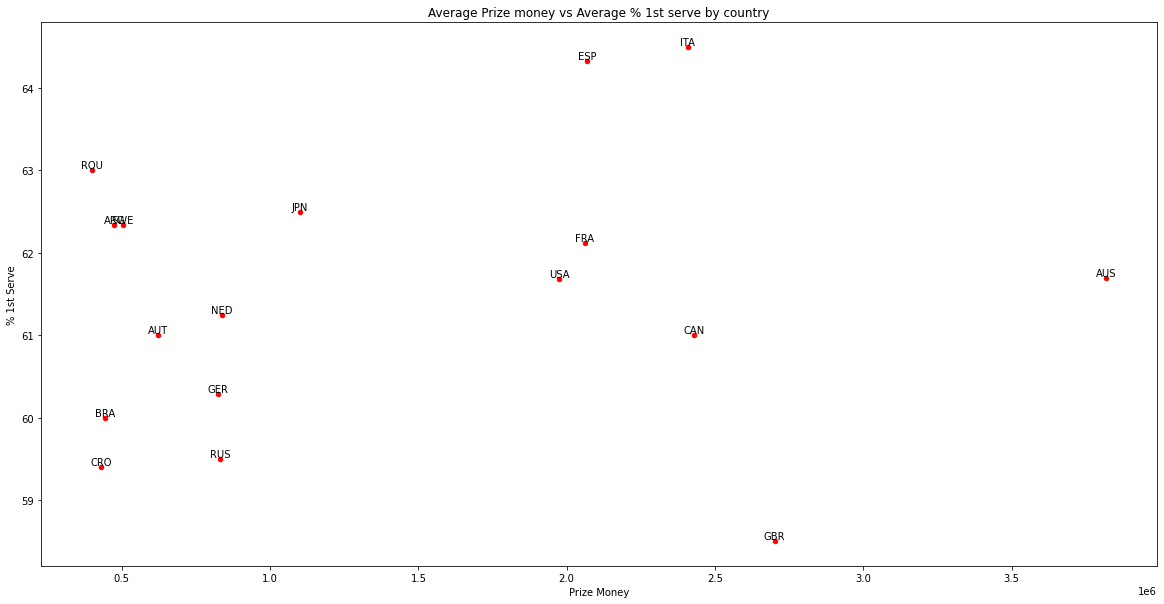

In [11]:
merge.plot.scatter(x='Prize Money', y='% 1st Serve',title = 'Average Prize money vs Average % 1st serve by country', color = 'red',figsize=(20,10))
for (xi, yi,zi) in zip(merge['Prize Money'],merge['% 1st Serve'],merge['Nationality']):
    plt.text(xi, yi, zi, va='bottom', ha='center')
plt.savefig("prizevsskillbycountry.png", bbox_inches = 'tight')

In [21]:
returns = pd.read_csv('/users/lmackenroth/ds_1300_notebooks/work/Tennis.csv')
returns.head()

,1,Nationality,Serve Rating,% 1st serve,% 2nd Serve,% Games One,% Break Points
0,2.0,ARG,171.5,0.36,0.54,0.35,0.46
1,3.0,ARG,168.1,0.36,0.53,0.33,0.47
2,4.0,ESP,167.9,0.34,0.55,0.34,0.45
3,5.0,ESP,166.6,0.34,0.56,0.32,0.44
4,6.0,ARG,166.3,0.35,0.53,0.33,0.46


In [22]:
serves.groupby(by = 'Nationality').mean().head()
#only run this next part once
returns['% 1st serve'] *= 100
returns['% 2nd Serve'] *= 100
returns['% Games One'] *= 100
returns['% Break Points'] *= 100
returns.head()


,1,Nationality,Serve Rating,% 1st serve,% 2nd Serve,% Games One,% Break Points
0,2.0,ARG,171.5,36.0,54.0,35.0,46.0
1,3.0,ARG,168.1,36.0,53.0,33.0,47.0
2,4.0,ESP,167.9,34.0,55.0,34.0,45.0
3,5.0,ESP,166.6,34.0,56.0,32.0,44.0
4,6.0,ARG,166.3,35.0,53.0,33.0,46.0


In [23]:
df = returns.sort_values(by='Nationality',ascending=True).groupby('Nationality').mean()
p1 = df[['% 1st serve','% 2nd Serve', '% Games One', '% Break Points']]
p1=p1.reset_index()
p1['Country'] = p1['Nationality']
merge = pd.merge(p1,countr,right_on='Tournament',left_on='Nationality',how='inner')
merge

,Nationality,% 1st serve,% 2nd Serve,% Games One,% Break Points,Country,Prize Money
0,ARG,33.266667,52.600000,29.466667,43.400000,ARG,4.753000e+05
1,AUS,32.000000,54.000000,30.000000,43.000000,AUS,3.819080e+06
2,AUT,32.333333,53.333333,30.000000,43.000000,AUT,6.219890e+05
3,BRA,33.000000,51.666667,28.000000,42.333333,BRA,4.425000e+05
4,CRO,33.500000,51.000000,29.000000,46.000000,CRO,4.306074e+05
5,ESP,32.941176,53.294118,29.705882,43.764706,ESP,2.069512e+06
6,FRA,32.200000,51.200000,27.200000,42.800000,FRA,2.060559e+06
7,GBR,33.000000,55.000000,31.000000,43.000000,GBR,2.700741e+06
8,GER,31.000000,51.250000,27.000000,42.750000,GER,8.241822e+05
9,IND,31.000000,53.000000,28.000000,39.000000,IND,3.982500e+05


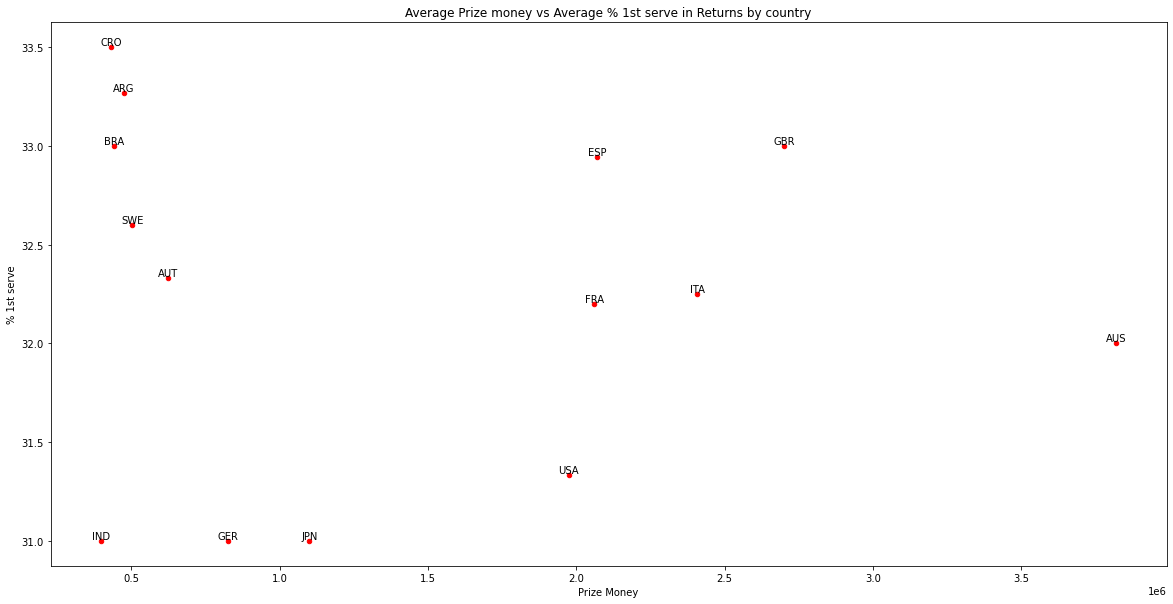

In [25]:
merge.plot.scatter(x='Prize Money', y='% 1st serve',title = 'Average Prize money vs Average % 1st serve in Returns by country', color = 'red',figsize=(20,10))
for (xi, yi,zi) in zip(merge['Prize Money'],merge['% 1st serve'],merge['Nationality']):
    plt.text(xi, yi, zi, va='bottom', ha='center')
plt.savefig("prizevsskillbycountryreturns.png", bbox_inches = 'tight')

In [35]:
underp = pd.read_csv('/users/lmackenroth/ds_1300_notebooks/work/under.csv')
underp.head()

,Player,Under Pressure Rating©,Country,Break Points Converted,Break Points Saved,Tie Breaks Won,Deciding Sets Won,Unnamed: 7
0,1,Novak Djokovic,SRB,247.8,44.2,65.4,65.0,73.2
1,2,Pete Sampras,USA,241.9,40.6,67.9,64.1,69.3
2,3,Rafael Nadal,ESP,240.5,44.9,66.4,60.9,68.3
3,4,Roger Federer,SUI,238.9,41.1,67.3,65.3,65.2
4,5,Carlos Alcaraz,ESP,237.6,42.5,63.3,61.6,70.2


In [36]:
underp.groupby(by = 'Country').mean().head()


,Player,Break Points Converted,Break Points Saved,Tie Breaks Won,Deciding Sets Won,Unnamed: 7
Country,,,,,,
ARG,28.714286,224.757143,42.842857,59.085714,61.500000,61.328571
AUS,50.000000,219.100000,40.414286,61.885714,57.185714,59.614286
AUT,30.000000,226.250000,41.850000,62.850000,56.500000,65.050000
BEL,97.000000,211.900000,41.200000,59.800000,49.300000,61.600000
BRA,70.000000,214.500000,40.800000,62.700000,50.400000,60.600000


In [38]:
df = underp.sort_values(by='Country',ascending=True).groupby('Country').mean()
p1 = df[['Break Points Saved','Tie Breaks Won', 'Deciding Sets Won']]
p1=p1.reset_index()
merge = pd.merge(p1,countr,right_on='Tournament',left_on='Country',how='inner')
merge

,Country,Break Points Saved,Tie Breaks Won,Deciding Sets Won,Prize Money
0,ARG,42.842857,59.085714,61.500000,4.753000e+05
1,AUS,40.414286,61.885714,57.185714,3.819080e+06
2,AUT,41.850000,62.850000,56.500000,6.219890e+05
3,BRA,40.800000,62.700000,50.400000,4.425000e+05
4,CAN,36.500000,66.650000,60.850000,2.430000e+06
5,CRO,38.325000,64.175000,54.750000,4.306074e+05
6,ESP,42.400000,60.760000,56.820000,2.069512e+06
7,FRA,40.012500,60.725000,57.737500,2.060559e+06
8,GBR,39.900000,64.150000,57.900000,2.700741e+06
9,GER,40.114286,62.514286,55.428571,8.241822e+05


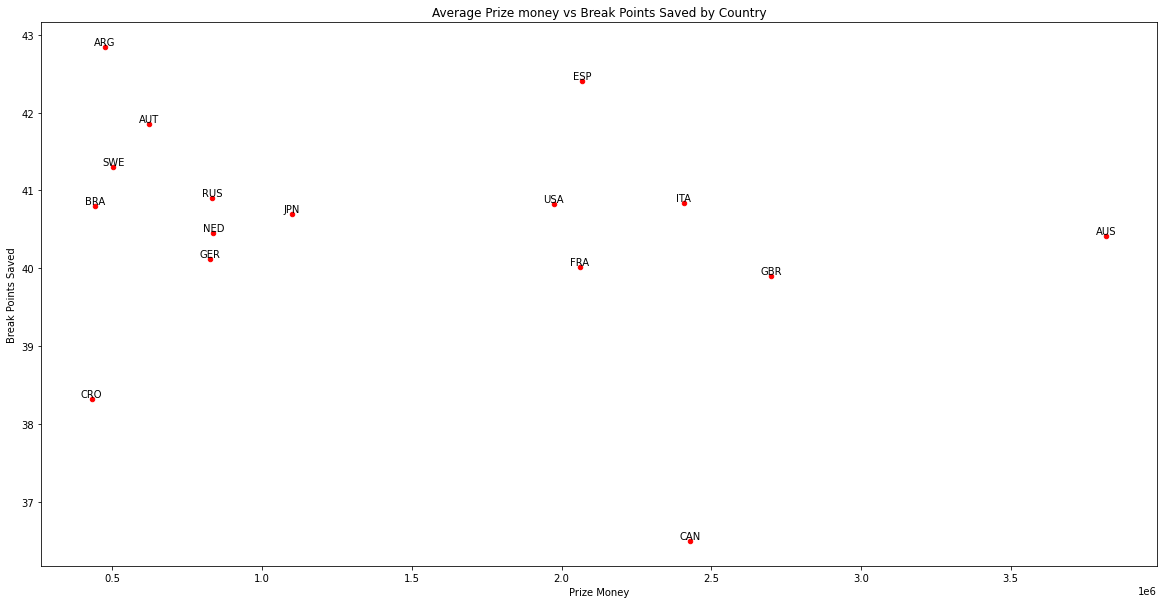

In [40]:
merge.plot.scatter(x='Prize Money', y='Break Points Saved',title = 'Average Prize money vs Break Points Saved by Country', color = 'red',figsize=(20,10))
for (xi, yi,zi) in zip(merge['Prize Money'],merge['Break Points Saved'],merge['Country']):
    plt.text(xi, yi, zi, va='bottom', ha='center')
plt.savefig("prizevsskillbycountryup.png", bbox_inches = 'tight')

In [ ]:

df = pd.read_csv('/users/lmackenroth/ds_1300_notebooks/work/GrandSlam.csv')
df.head()

,Year,Major#,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final
0,1968,2,Ken Rosewall,2,AUS,Rod Laver,1,AUS,"6–3, 6–1, 2–6, 6–2"
1,1968,3,Rod Laver,1,AUS,Tony Roche,15,AUS,"6–3, 6–4, 6–2"
2,1968,4,Arthur Ashe,5,USA,Tom Okker,8,NED,"14–12, 5–7, 6–3, 3–6, 6–3"
3,1969,1,Rod Laver,1,AUS,Andrés Gimeno,9,ESP,"6–3, 6–4, 7–5"
4,1969,2,Rod Laver,1,AUS,Ken Rosewall,4,AUS,"6–4, 6–3, 6–4"


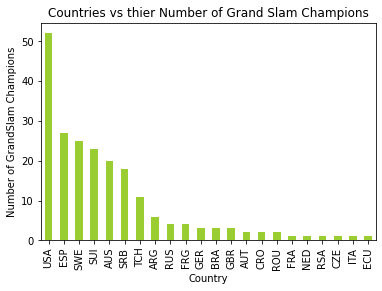

In [14]:
ax = df['Ctry_Champion'].value_counts()
c = ax.plot.bar(title = 'Countries vs thier Number of Grand Slam Champions', color = 'yellowgreen' )
c.set_xlabel("Country")
c.set_ylabel("Number of GrandSlam Champions")
plt.savefig("countryvs#grandchamps.png", bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>